In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import keras

from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications import EfficientNetB0
from keras.models import Model

In [3]:
# Load EfficientNetB0 model pre-trained on ImageNet dataset
model = EfficientNetB0(weights='imagenet', include_top=True)

In [4]:
# Choose a layer from the model for feature extraction
# Let's use 'top_activation' layer
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("top_activation").output)

In [5]:
feat_extractor.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

1/1 [==============================] - 2s 2s/step


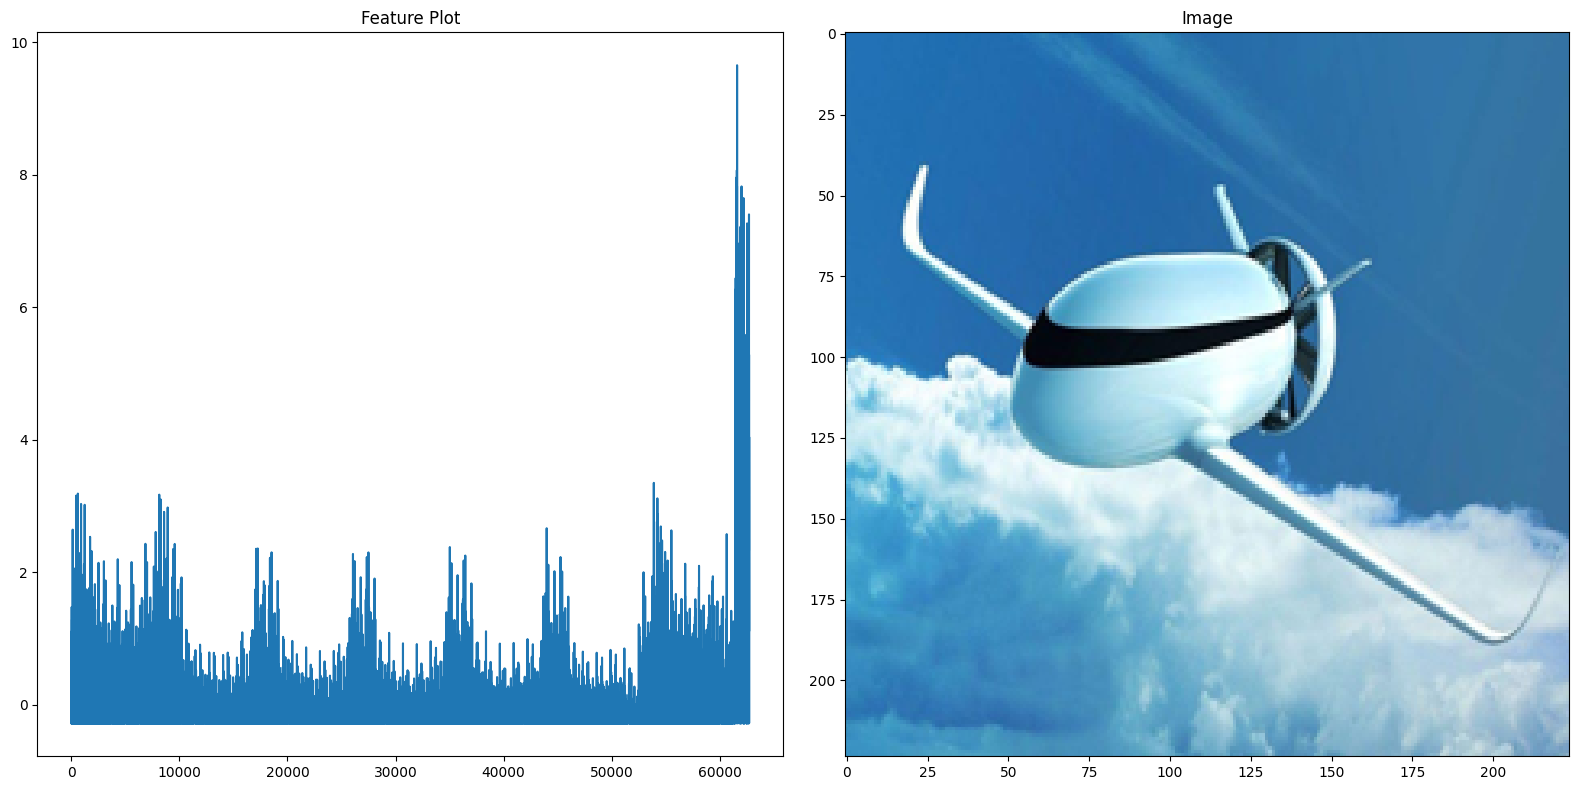

In [6]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image if necessary
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    return img, x

# Assuming you have defined feat_extractor and load_image functions

image_path = "/content/drive/MyDrive/AIWR/Dataset/download/Planes/4.jpeg"
img, x = load_image(image_path)
feat = feat_extractor.predict(x)
feat_flat = feat.flatten()

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Create the subplot for the plot of feat[0]
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(feat_flat)
plt.title('Feature Plot')

# Create the subplot for displaying the image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(img)
plt.title('Image')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


In [7]:
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-l7e01jsi
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-l7e01jsi
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done


In [8]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [10]:
import torch
from yolov5.models.yolo import Model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).to(device)
model.eval()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-303-gcf8b67b7 Python-3.10.12 torch-2.2.2+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Creating a Posting List

In [11]:
dict = { i: [] for i in range(0, 80) }

In [12]:
feature_dict = { i: [] for i in range(0, 80) }

# Import Model

In [13]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
object_detection_model = YOLO('yolov8n.pt')

# Posting List for a object || Creating Posting List for a single object

In [14]:
image_path = '/content/drive/MyDrive/AIWR/Dataset/download/Fruits/31.jpeg'
results = object_detection_model( image_path, conf = 0.5)

# extracting results
image_results = results[0].boxes.cpu().numpy()

# getting class labels
class_labels = image_results.cls
class_labels = set(class_labels)

# adding image in respective class label
for i in class_labels:
    dict[i].append(image_path)


image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/Fruits/31.jpeg: 640x512 1 orange, 1 refrigerator, 277.3ms
Speed: 8.0ms preprocess, 277.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 512)


In [15]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

# Create Posting lists for objects and all images in dataset

# CodeBuddy

In [16]:
import ReadBuddy as rb
my_reader=rb.ReadBuddy("/content/drive/MyDrive/AIWR/Dataset/download")
_,folder_dict=my_reader.create_folder_dictionary()


In [17]:
def get_class_id(model, image_path):
    results = model( image_path, conf = 0.5)

    # extracting results
    image_results = results[0].boxes.cpu().numpy()

    # getting class labels
    class_labels = image_results.cls
    class_labels = set(class_labels)
    return class_labels

In [18]:
def update_posting_list(model, image_path , dict ):

    class_labels = get_class_id(model, image_path)
    # adding image in respective class label
    for i in class_labels:
        dict[i].append(image_path)
    return dict

In [19]:

for i in folder_dict:

    for image_path in folder_dict[i]:
        update_posting_list(object_detection_model, image_path, dict)





image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/River/31.jpeg: 448x640 (no detections), 299.5ms
Speed: 4.8ms preprocess, 299.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/River/32.jpeg: 384x640 (no detections), 259.8ms
Speed: 2.9ms preprocess, 259.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/River/28.jpeg: 480x640 (no detections), 381.6ms
Speed: 4.1ms preprocess, 381.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/River/29.jpeg: 384x640 (no detections), 261.7ms
Speed: 3.6ms preprocess, 261.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/River/27.jpeg: 640x384 (no detections), 279.6ms
Speed: 3.8ms preprocess, 279.6ms inference, 1.6ms postprocess per image at shape (1, 3, 

# Extract features and put them in new feature posting list

# Using VGG16 model to extract features as it performed better

In [20]:

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [21]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 13s 0us/step


In [22]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image if necessary
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    return img, x

# Creating Feature Posting List for detected objects in the dataset

In [24]:
for i in dict:
    for image_path in dict[i]:
        img, x = load_image(image_path)
        feat = feat_extractor.predict(x)[0]
        feature_dict[i].append(feat)


1/1 [==============================] - 1s 583ms/step


# Now at this point feature extraction is done all i have to do is

* get a new image
* run the object detection routine
* get all the feature vectors for the detected objects from feature posting list


* extract features for the new image
* do a cosine similarity with the small feature posting list

* return results

In [25]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = "/content/drive/MyDrive/AIWR/Dataset/download/Dog/17.jpeg"
img, x = load_image(image_path)
feat = feat_extractor.predict(x)

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Create the first subplot for the plot of feat[0]
plt.subplot(3, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(feat[0])
plt.title('Feature Plot')

# Create the second subplot for displaying the image
plt.subplot(2, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(img)
plt.title('Image')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

1/1 [==============================] - 1s 812ms/step


In [26]:
s = 16
for i in range(0, len(feature_dict[s])):

    img, x = load_image(dict[s][i])
    plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

    # Create the first subplot for the plot of feat[0]
    plt.subplot(3, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.plot(feature_dict[s][i])
    plt.title('Feature Plot')

    # Create the second subplot for displaying the image
    plt.subplot(2, 2, 2)  # 1 row, 2 columns, subplot 2
    plt.imshow(img)
    plt.title('Image')

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

<ipython-input-26-ee043f7b39e8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 8))  # Adjust the figure size as needed


In [27]:

image_path = "/content/drive/MyDrive/AIWR/Dataset/download/Dog/17.jpeg"
new_image, x = load_image(image_path)
new_features = feat_extractor.predict(x)

# get class ids of image
class_id = get_class_id(object_detection_model, image_path)

search_space = []
for i in class_id:
    search_space = feature_dict[i]



1/1 [==============================] - 1s 620ms/step

image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/Dog/17.jpeg: 448x640 1 dog, 169.2ms
Speed: 3.6ms preprocess, 169.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


In [28]:
search_space == feature_dict[16]

True

In [29]:
from scipy.spatial import distance



def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        # print(idx)
        img = image.load_img(dict[16][idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image




In [30]:

n_distances = [ distance.cosine(new_features[0], feat) for feat in feature_dict[16] ]

n_idx_closest = sorted(range(len(n_distances)), key=lambda k: n_distances[k])[0:5]  # grab first 5
n_results_image = get_concatenated_images(n_idx_closest, 200)

# display the results
plt.figure(figsize = (5,15))
plt.imshow(new_image)
plt.title("query image")


# display the resulting images
plt.figure(figsize = (16,8))
plt.imshow(n_results_image)
plt.title("Direct Vectorization results")

Text(0.5, 1.0, 'Direct Vectorization results')

# Image Retrieval using Object Detection and Feature Extraction

In [31]:
from scipy.spatial import distance



def get_concatenated_images_from_reduced_dictionary(indexes, thumb_height , image_dict):
    thumbs = []
    for idx in indexes:
        # print(idx)
        img = image.load_img(image_dict[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

In [33]:
def retriveImage(image_path):
    new_image, x = load_image(image_path)
    new_features = feat_extractor.predict(x)

    # get class ids of image
    class_id = get_class_id(object_detection_model, image_path)

    reduced_feature_space = []
    reduced_image_space = []
    for i in class_id:
        reduced_feature_space += feature_dict[i]
        reduced_image_space += dict[i]

    n_distances = [ distance.cosine(new_features[0], feat) for feat in reduced_feature_space ]

    n_idx_closest = sorted(range(len(n_distances)), key=lambda k: n_distances[k])[0:5]  # grab first 5
    n_results_image = get_concatenated_images_from_reduced_dictionary(n_idx_closest, 200, reduced_image_space)


    # display the results
    plt.figure(figsize = (5,15))
    plt.imshow(new_image)
    plt.title("query image")


    # display the resulting images
    plt.figure(figsize = (16,8))
    plt.imshow(n_results_image)
    plt.title("Retrived Results")


image_path = "/content/drive/MyDrive/AIWR/Dataset/download/Cat/20.jpeg"
retriveImage(image_path)





1/1 [==============================] - 1s 743ms/step

image 1/1 /content/drive/MyDrive/AIWR/Dataset/download/Cat/20.jpeg: 384x640 1 cat, 225.8ms
Speed: 6.9ms preprocess, 225.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
